## Introduction
The aim of this project is to clean up problematic data of US census data. Additionally, I will try to look for some insight from the processed data.

**Data Source:**
Codecademy

## Scoping

The scoping section will be segmented into four sections: goal, action, data, and analysis 

### Goal
The goal of the current project is to understand the distribution of race, income and gender across states:
- What is the distribution of race ratio?
- What is the relationship between racial distribution and income?
- What is the distribution of gender?
- What is the relationship between gender distribution and income?

### Action
We will analyze exising data provided by Codecademy. Primarily, python would be the code for analysis. 

### Data
There are 10 csv files given: all share the same data structure, with information of total population, race percentage, income and gender distribution.

### Analysis
Descriptive analysis, inferential analysis, and data visualisation will be employed to answer the aforementioned questions.

## Import Modules

In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob

## Data Exploration
I will take a look at the data structure of csv files given.

In [127]:
test0=pd.read_csv('states0.csv')
display(test0)

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Alabama,4830620,3.75%,61.88%,31.25%,0.45%,1.05%,0.03%,"$43,296.36",2341093M_2489527F
1,1,Alaska,733375,5.91%,60.91%,2.85%,16.39%,5.45%,1.06%,"$70,354.74",384160M_349215F
2,2,Arizona,6641928,29.57%,57.12%,3.85%,4.36%,2.88%,0.17%,"$54,207.82",3299088M_3342840F
3,3,Arkansas,2958208,6.22%,71.14%,18.97%,0.52%,1.14%,0.15%,"$41,935.63",1451913M_1506295F
4,4,California,38421464,37.29%,40.22%,5.68%,0.41%,13.05%,0.35%,"$67,264.78",19087135M_19334329F
5,5,Colorado,5278906,20.78%,69.90%,3.55%,0.57%,2.66%,NaN,"$64,657.80",2648667M_2630239F


There are in total 10 csv files given, which all has the same column name. Essentially, the csv file includes `state`, `total population`, `percentage of races`, `income`, and `distribution of genders`.

## Combine all the files
I will combine all the csv files in the following section.

In [128]:
files = glob.glob("states*.csv")

states_list=[]
for file in files:
    states_list.append(pd.read_csv(file))
census_list=pd.concat(states_list)
display(census_list.head())

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Rhode Island,1053661,13.36%,74.33%,5.68%,0.35%,3.25%,0.04%,"$59,125.27",510388M_543273F
1,1,South Carolina,4777576,5.06%,62.89%,28.75%,0.29%,1.25%,0.05%,"$46,296.81",2322409M_2455167F
2,2,South Dakota,843190,3.24%,82.50%,1.42%,9.42%,1.02%,0.04%,"$51,805.41",423477M_419713F
3,3,Tennessee,6499615,4.72%,73.49%,18.28%,0.23%,1.41%,0.04%,"$47,328.08",3167756M_3331859F
4,4,Texas,26538614,38.05%,44.69%,11.65%,0.26%,3.67%,0.07%,"$55,874.52",13171316M_13367298F


We can see that aside from `TotalPop`, other numerical columns are in incorrect format for analysis. This can be further explained by looking at the data type.

In [129]:
display(census_list.dtypes)

Unnamed: 0     int64
State         object
TotalPop       int64
Hispanic      object
White         object
Black         object
Native        object
Asian         object
Pacific       object
Income        object
GenderPop     object
dtype: object

Only `TotalPop` has the correct data type for analysis, others are currently object instead of integer or float.

## Data Cleaning

I will start off by cleaning race precentage columns. I will remove '%' mark and divide the number by 100 so as to do precise calculation later.

In [130]:
race_col=['Hispanic','White','Black','Native','Asian','Pacific']
census_list[race_col]=census_list[race_col].replace('%', '',regex=True)
census_list[race_col]=census_list[race_col].astype(float)
census_list[race_col]=census_list[race_col]/100
display(census_list.head())

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Rhode Island,1053661,0.1336,0.7433,0.0568,0.0035,0.0325,0.0004,"$59,125.27",510388M_543273F
1,1,South Carolina,4777576,0.0506,0.6289,0.2875,0.0029,0.0125,0.0005,"$46,296.81",2322409M_2455167F
2,2,South Dakota,843190,0.0324,0.8250,0.0142,0.0942,0.0102,0.0004,"$51,805.41",423477M_419713F
3,3,Tennessee,6499615,0.0472,0.7349,0.1828,0.0023,0.0141,0.0004,"$47,328.08",3167756M_3331859F
4,4,Texas,26538614,0.3805,0.4469,0.1165,0.0026,0.0367,0.0007,"$55,874.52",13171316M_13367298F


Next, I will remove the '$' mark and comma for the `Income` column.

In [131]:
census_list['Income']=census_list['Income'].replace('[\$,]','',regex=True)
display(census_list.head())

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Rhode Island,1053661,0.1336,0.7433,0.0568,0.0035,0.0325,0.0004,59125.27,510388M_543273F
1,1,South Carolina,4777576,0.0506,0.6289,0.2875,0.0029,0.0125,0.0005,46296.81,2322409M_2455167F
2,2,South Dakota,843190,0.0324,0.8250,0.0142,0.0942,0.0102,0.0004,51805.41,423477M_419713F
3,3,Tennessee,6499615,0.0472,0.7349,0.1828,0.0023,0.0141,0.0004,47328.08,3167756M_3331859F
4,4,Texas,26538614,0.3805,0.4469,0.1165,0.0026,0.0367,0.0007,55874.52,13171316M_13367298F


Lastly, the `GenderPop` column needs to divide into male and female column by splitting it with underscore and remove 'M' and 'F'.

In [132]:
male=[]
female=[]
for x in census_list['GenderPop']:
    x = x.replace('M', '')
    x = x.replace('F', '')
    x_replace = x.split('_')
    male.append(x_replace[0])
    female.append(x_replace[1])
male=pd.to_numeric(male)
female=pd.to_numeric(female)
census_list['male']=male
census_list['female']=female

display(census_list)

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,male,female
0,0,Rhode Island,1053661,0.1336,0.7433,0.0568,0.0035,0.0325,0.0004,59125.27,510388M_543273F,510388,543273.0
1,1,South Carolina,4777576,0.0506,0.6289,0.2875,0.0029,0.0125,0.0005,46296.81,2322409M_2455167F,2322409,2455167.0
2,2,South Dakota,843190,0.0324,0.8250,0.0142,0.0942,0.0102,0.0004,51805.41,423477M_419713F,423477,419713.0
3,3,Tennessee,6499615,0.0472,0.7349,0.1828,0.0023,0.0141,0.0004,47328.08,3167756M_3331859F,3167756,3331859.0
4,4,Texas,26538614,0.3805,0.4469,0.1165,0.0026,0.0367,0.0007,55874.52,13171316M_13367298F,13171316,13367298.0
5,5,Utah,2903379,0.1347,0.7941,0.0102,0.0108,0.0220,0.0083,63488.92,1459229M_1444150F,1459229,1444150.0
0,0,Utah,2903379,0.1347,0.7941,0.0102,0.0108,0.0220,0.0083,63488.92,1459229M_1444150F,1459229,1444150.0
1,1,Vermont,626604,0.0161,0.9398,0.0098,0.0030,0.0124,0.0003,55602.97,308573M_318031F,308573,318031.0
2,2,Virginia,8256630,0.0801,0.6327,0.2018,0.0021,0.0546,0.0006,72866.01,4060948M_4195682F,4060948,4195682.0
3,3,Washington,6985464,0.1114,0.7204,0.0338,0.0141,0.0702,0.0061,64493.77,3487725M_3497739F,3487725,3497739.0


After processing all the data, I will check duplicates and NaN in the following section.

In [133]:
census_list.duplicated(subset = census_list.columns[1:]).any()

True

In [134]:
census=census_list.drop_duplicates(subset=census_list.columns[1:]).sort_values('State')
display(census)

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,male,female
0,0,Alabama,4830620,0.0375,0.6188,0.3125,0.0045,0.0105,0.0003,43296.36,2341093M_2489527F,2341093,2489527.0
1,1,Alaska,733375,0.0591,0.6091,0.0285,0.1639,0.0545,0.0106,70354.74,384160M_349215F,384160,349215.0
2,2,Arizona,6641928,0.2957,0.5712,0.0385,0.0436,0.0288,0.0017,54207.82,3299088M_3342840F,3299088,3342840.0
3,3,Arkansas,2958208,0.0622,0.7114,0.1897,0.0052,0.0114,0.0015,41935.63,1451913M_1506295F,1451913,1506295.0
4,4,California,38421464,0.3729,0.4022,0.0568,0.0041,0.1305,0.0035,67264.78,19087135M_19334329F,19087135,19334329.0
0,0,Colorado,5278906,0.2078,0.6990,0.0355,0.0057,0.0266,NaN,64657.80,2648667M_2630239F,2648667,2630239.0
1,1,Connecticut,3593222,0.1560,0.6768,0.1035,0.0013,0.0402,0.0002,76146.56,1751607M_1841615F,1751607,1841615.0
2,2,Delaware,926454,0.0882,0.6463,0.2074,0.0026,0.0327,NaN,61827.98,448413M_478041F,448413,478041.0
3,3,District of Columbia,647484,0.0917,0.3310,0.5178,0.0020,0.0338,0.0003,75466.36,306674M_340810F,306674,340810.0
4,4,Florida,19645772,0.2134,0.5908,0.1517,0.0021,0.0228,0.0005,50690.19,9600009M_10045763F,9600009,10045763.0


After deleting duplicates, I will examine if there's any NaN.

In [135]:
census.isna().any()

Unnamed: 0    False
State         False
TotalPop      False
Hispanic      False
White         False
Black         False
Native        False
Asian         False
Pacific        True
Income        False
GenderPop     False
male          False
female         True
dtype: bool

In [136]:
census.Pacific=census.Pacific.fillna(1-(census.Hispanic+census.White+census.Black+census.Asian+census.Native))
census.Pacific.isna().any()

False

In [137]:
census.female=census.female.fillna(census.TotalPop-census.male)
census.female.isna().any()

False

After filling the NaN with correct number, all data was cleaned and ready to be analyzed.

## Analysis

The project aimed to understand the relationship between incomes and other variable (race and gender distribution). The following section would focus on the relationship between incomes and race distribution.

### Racial distribution
Let's take a look at the distribution of race across states first.

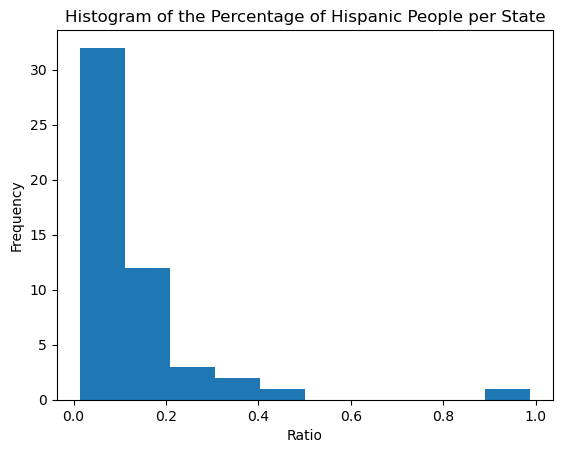

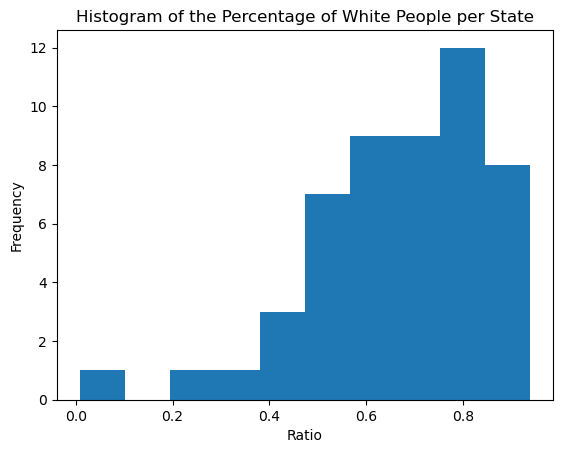

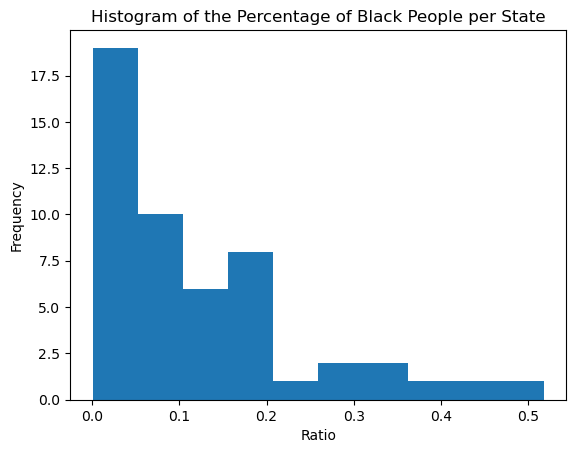

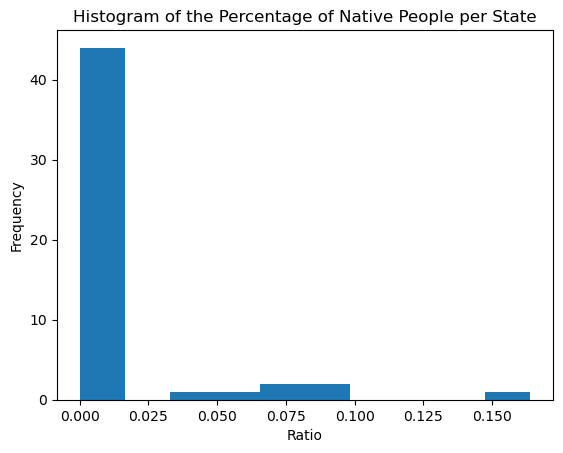

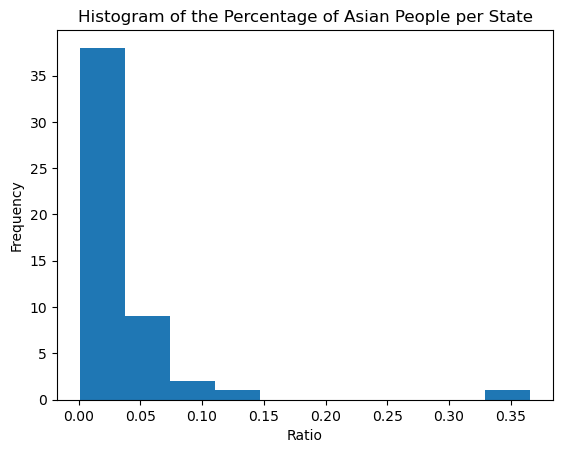

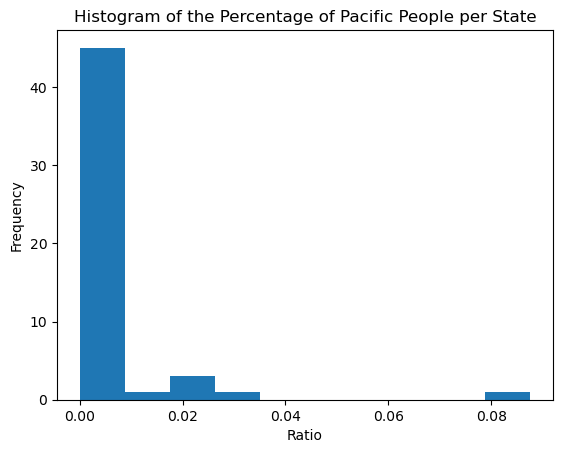

<Figure size 640x480 with 0 Axes>

In [154]:
for race in race_col:
    plt.hist(census[race])
    plt.title("Histogram of the Percentage of {} People per State".format(race))
    plt.xlabel("Ratio")
    plt.ylabel("Frequency")
    plt.show()
    plt.clf()

We can tell that most races shared a similar distribution, except for caucasian American. **Over half of the states have white American higher than 50% of the total state population.**

### The relationship between racial distribution and income.

In [145]:
from scipy.stats import pearsonr
census.Income=census.Income.astype(float)
for race in race_col:
    corr, p_val = pearsonr(census[race], census['Income'])
    print(f'The correlation between {race} race percentage and income is {corr:.4f}, with a p-value of {p_val:.4f}')

The correlation between Hispanic race and income is -0.2323, with a p-value of 0.1010
The correlation between White race and income is -0.0133, with a p-value of 0.9264
The correlation between Black race and income is 0.0087, with a p-value of 0.9518
The correlation between Native race and income is 0.0038, with a p-value of 0.9791
The correlation between Asian race and income is 0.4898, with a p-value of 0.0003
The correlation between Pacific race and income is 0.2712, with a p-value of 0.0542


**It seems like only the correlation between Asian race percentage and income has significant correlation, and it's positive!**

### Gender distribution

Let's compare the number of states with more male vs states with more female.

/Users/sheng/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


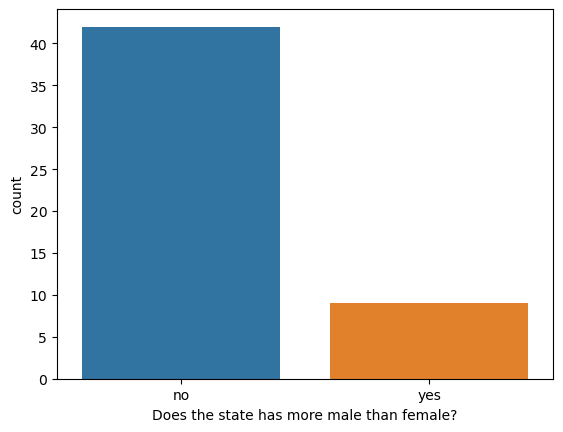

In [162]:
census['more_male']=census.apply(lambda x: 'yes' if x.male-x.female >0 else 'no', axis=1)
sns.countplot(census['more_male'])
plt.xlabel('Does the state has more male than female?')
plt.show()

**The barplot tells us that in America, most of the states have higher number of female than male!**

### The relationship between gender distribution and income.
Next, we will examine the correlation between gender and income. But first, we need to convert absolute number of gender into percentage.

In [164]:
census['male_ratio']= census.male/census.TotalPop
census['female_ratio']= census.female/ census.TotalPop
display(census.head())

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,male,female,male_ratio,female_ratio,more_male
0,0,Alabama,4830620,0.0375,0.6188,0.3125,0.0045,0.0105,0.0003,43296.36,2341093M_2489527F,2341093,2489527.0,0.484636,0.515364,no
1,1,Alaska,733375,0.0591,0.6091,0.0285,0.1639,0.0545,0.0106,70354.74,384160M_349215F,384160,349215.0,0.523825,0.476175,yes
2,2,Arizona,6641928,0.2957,0.5712,0.0385,0.0436,0.0288,0.0017,54207.82,3299088M_3342840F,3299088,3342840.0,0.496706,0.503294,no
3,3,Arkansas,2958208,0.0622,0.7114,0.1897,0.0052,0.0114,0.0015,41935.63,1451913M_1506295F,1451913,1506295.0,0.490808,0.509192,no
4,4,California,38421464,0.3729,0.4022,0.0568,0.0041,0.1305,0.0035,67264.78,19087135M_19334329F,19087135,19334329.0,0.496783,0.503217,no


In [152]:
corr1,p_val1=pearsonr(census.male_ratio,census.Income)
print(f'The correlation bewteen male ratio and income is {corr1}, with a p-value of {p_val1}')

corr2,p_val2=pearsonr(census.female_ratio,census.Income)
print(f'The correlation bewteen female ratio and income is {corr2}, with a p-value of {p_val2}')

The correlation bewteen male ratio and income is 0.14461805714489723, with a p-value of 0.31129388973267175
The correlation bewteen female ratio and income is -0.1446180571448978, with a p-value of 0.31129388973266914


No significant correlation was found, indicating two genders shared similar amount of income generally.

## Conclusions
This project was aimed to make visualisation and inferential analysis about the racial and gender distribution.

The analysis of this project was dedicated to answer the following questions:
- What is the distribution of race ratio?
    - Most states have white people as the predominant race.
- What is the relationship between racial distribution and income?
    - Only Asian percentage were observed to be significantly correlated with income.
- What is the distribution of gender?
    - Most states have higher ratio of female compared to male.
- What is the relationship between gender distribution and income?
    - No significant difference was detected between gender distribution and income.